### Objetivo do algoritmo: realizar preprocessamento da base de dados.

In [1]:
import pandas as pd, \
       numpy as np, \
       seaborn as sns, \
       matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'../_Material/Bases de dados/census.csv')
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.describe()  # Visualizando estatísticas gerais da base de dados

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.isnull().sum()  # Verificando se existem valores nulos

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

### Visualização dos dados

A análise exploratória dos dados é importante porque é através dela que podemos verificar as condições da base de dados, entendendo o que cada atributo representa e identificando possíveis falhas, ajustando-as para realizar o aprendizado de máquina.

In [5]:
np.unique( df['income'], return_counts=True )

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

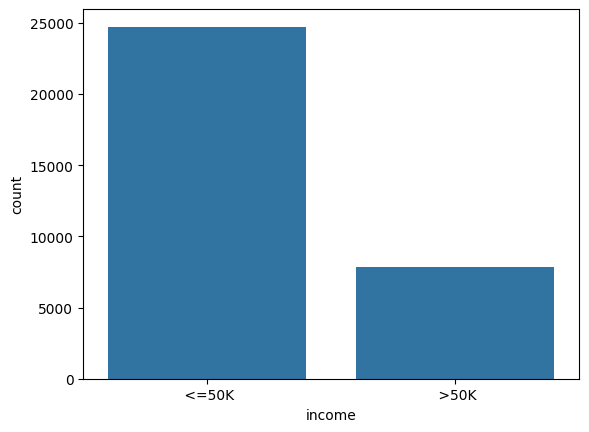

In [6]:
sns.countplot( x = df['income'] );

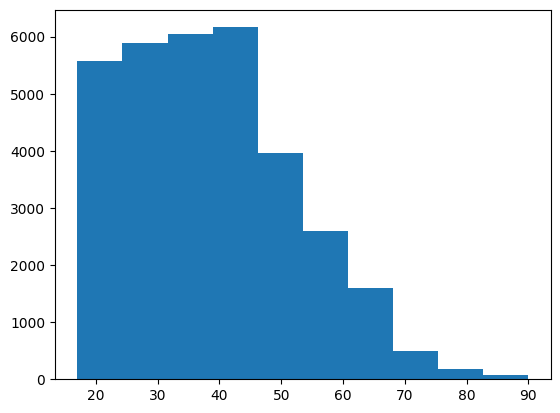

In [7]:
plt.hist( df['age'] );  # Verificando a idade

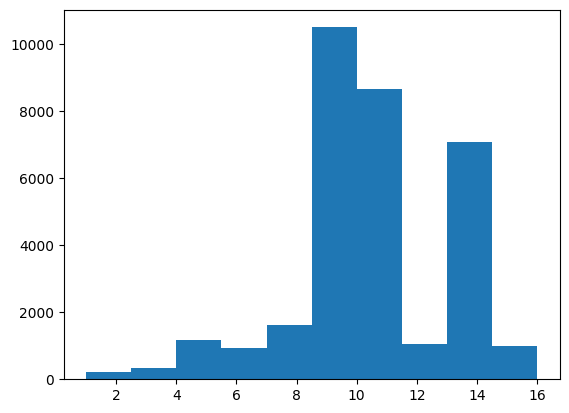

In [8]:
plt.hist( df['education-num'] );  # Vetificando anos de estudo

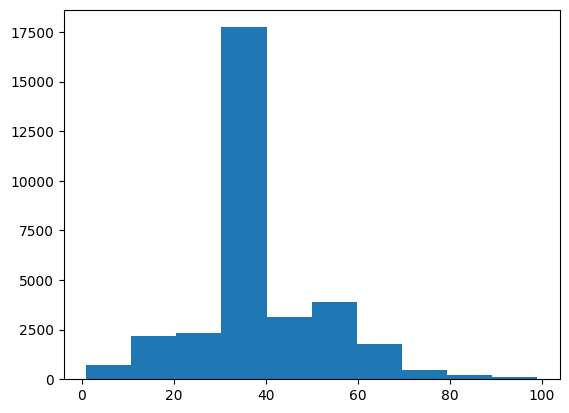

In [9]:
plt.hist( df['hour-per-week'] );  # Verificando horas de trabalho

#### Divisão entre previsores e classe

In [10]:
list(df.columns).index( 'income' )  # Verificando posição de "income"

14

In [11]:
x_previsores = df.iloc[:, 0:14].values  # Selecionando colunas de 0 a 13 (14 não é incluído)

x_previsores

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [12]:
y_classe = df.iloc[:, 14].values

y_classe

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

#### Tratando valores de texto com LabelEncoder

   
O aprendizado de máquina ocorre por meio de operações matemáticas entre matrizes, portanto os valores em formato de texto devem se tornar numéricos. Para isso, existem ferramentas capazes de codificar strings e, entre elas, temos a LabelEncoder, que designa um número distinto a cada uma das strings em uma coluna do conjunto de dados.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()

# Verificando posições de colunas com valores de texto e codificando-as

posicoes_encoding = ()  # Índices de colunas que precisam ser tratadas

# Para cada indice e tipo de coluna nos tipos de coluna do dataframe
for indice, tipo_coluna in enumerate(df.iloc[:, 0:14].dtypes):
    
    if tipo_coluna == 'O':  # Se o tipo da coluna não for número
        posicoes_encoding += (indice, )  # Adicionar posição da coluna à tupla de posições

In [15]:
print('Antes\n', x_previsores)

# Para cada posição na tupla de posições de colunas para encoding
for posicao in posicoes_encoding: 
    
    # Substituir coluna original com valores codificados
    x_previsores[:, posicao] = label_encoder.fit_transform( x_previsores[:, posicao] )
    
print('\nDepois\n', x_previsores)  # Exibindo valores convertidos

Antes
 [[39 ' State-gov' 77516 ... 0 40 ' United-States']
 [50 ' Self-emp-not-inc' 83311 ... 0 13 ' United-States']
 [38 ' Private' 215646 ... 0 40 ' United-States']
 ...
 [58 ' Private' 151910 ... 0 40 ' United-States']
 [22 ' Private' 201490 ... 0 20 ' United-States']
 [52 ' Self-emp-inc' 287927 ... 0 40 ' United-States']]

Depois
 [[39 7 77516 ... 0 40 39]
 [50 6 83311 ... 0 13 39]
 [38 4 215646 ... 0 40 39]
 ...
 [58 4 151910 ... 0 40 39]
 [22 4 201490 ... 0 20 39]
 [52 5 287927 ... 0 40 39]]


#### Codificando valores de texto com OneHotEncoder

#### Explicação
O __LabelEncoder__ designa um número para cada valor distinto em uma coluna. Por exemplo, valores como _"carro" e "avião" poderiam ser substituídos por 10 e 20, respectivamente._ Entretanto, existe diferença entre esses valores - _em outras palavras, diferença de peso_ -, levando o algoritmo a encarar o maior valor como mais importante, afetando diretamente as previsões do modelo.

Tendo isso em mente, o __OneHotEncoder__ _codifica os valores gerando novas colunas de acordo com a quantidade de valores diferentes em uma coluna._ Portanto, se tivermos 3 valores distintos em uma coluna, três colunas serão geradas e cada uma receberá um valor entre 1 e 0, gerando um código de identificação único para cada valor. Dessa forma, não haverá diferença de pesos entre valores e os resultados das operações matemáticas entre matrizes não será afetada.

__Observação: Neste caso, os dados passados ao OneHotEncoder estão codificados pelo LabelEncoder, mas se não estivesse codificado pelo LabelEncoder, o resultado seria idêntico. Resumindo, não é necessário usar o LabelEncoder para usar o OneHotEncoder__. 

In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Classe usada para conversão/transformação
from sklearn.compose import ColumnTransformer  # Classe para aplicar uma transformação

In [17]:
# Configurando a transformação com OHC

one_hot_encoder = ColumnTransformer(
    
    transformers = [ # Cada tupla dentro da lista representa uma transformação
        
        ( # Tupla da transformação
        'OneHot',  # Nome da transformação
        OneHotEncoder(),  # Classe que é usada para transformar a coluna
        posicoes_encoding  # Posições de colunas do df onde a codificação OneHot será aplicada
        )
    
    ],
    
    # String que faz com que as colunas não modificadas permaneçam no conjunto de dados sem serem removidas
    remainder = 'passthrough'
    
)

In [18]:
# Codificando valores
x_previsores = one_hot_encoder.fit_transform(x_previsores).toarray()

x_previsores

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

#### Ajustando escalonamento dos valores

In [19]:
standard_scale = StandardScaler()  # Instanciando classe de padronização

x_previsores = standard_scale.fit_transform( x_previsores )  # Padronização de valores

x_previsores  # Exibindo valores padronizados/escalonados

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

#### Definindo a base de treinamento e a base de teste

In [20]:
from sklearn.model_selection import train_test_split  # Classe para divisão entre base de treino e base de teste

In [21]:
# A classe retorna quatro conjuntos de dados simultâneamente. Portanto, quatro variáveis são necessárias. 

x_prev_treinamento, x_prev_teste, y_classe_treinamento, y_classe_teste = train_test_split(
    x_previsores,
    y_classe,
    test_size = 0.15,  # Definindo que a base de teste deve ficar com 15% dos dados da base original
    random_state = 0  # Definindo que a base de dados de teste deve permanecer sem valores aleatórios
)

In [22]:
x_prev_teste.shape, y_classe_teste.shape  # Verificando shape da base de teste

((4885, 108), (4885,))

In [23]:
x_prev_treinamento.shape, y_classe_treinamento.shape  # Verificando shape da base de treinamento

((27676, 108), (27676,))

### Salvando a base de dados

In [24]:
import pickle  # Biblioteca para guardar multiplas variáveis em um arquivo

In [25]:
# Salvando bases de dados no arquivo "base_census.pkl"
with open(r'../_Material/Bases de dados/Bases pre-processadas/base_census.pkl', mode='wb') as arquivo:
    pickle.dump([
        x_prev_treinamento,
        y_classe_treinamento,
        x_prev_teste,
        y_classe_teste
    ],
    arquivo
    )